In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten

In [2]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

In [4]:
#%%time
stacked_rh_wav_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Stacked/"
sf_stacked_rh_wav = pd.read_csv(stacked_rh_wav_path + 'sf_2018_stacked_rh_wav.csv')

#### Removing NANs

In [14]:
#sf_stacked_rh_wav = sf_stacked_rh_wav[sf_stacked_rh_wav['logsum_trip_Potential_INEXUS'].notna()]

In [356]:
sf_stacked_rh_wav['income_level'] = np.where(sf_stacked_rh_wav['income']>= 94000, 'High Income', 'Low Income')

In [ ]:
#sf_stacked_rh_wav.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [10]:
# determine the quartile values to use with pd.cut
#deciles = sf_baseline_2018['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [11]:
# add a lower and upper range for the bins in pd.cut
#deciles = [0] + deciles + [float('inf')]

In [12]:
# add a quartiles column to groups, using pd.cut
#sf_baseline_2018['income_deciles'] = pd.cut(sf_baseline_2018['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [15]:
#sf_rh_flsz_025.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [16]:
# determine the quartile values to use with pd.cut
#deciles = sf_rh_flsz_025['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [17]:
# add a lower and upper range for the bins in pd.cut
#deciles = [0] + deciles + [float('inf')]

In [18]:
# add a quartiles column to groups, using pd.cut
#sf_rh_flsz_025['income_deciles'] = pd.cut(sf_rh_flsz_025['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [19]:
#sf_rh_flsz_175.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [20]:
# determine the quartile values to use with pd.cut
#deciles = sf_rh_flsz_175['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [21]:
# add a lower and upper range for the bins in pd.cut
#deciles = [0] + deciles + [float('inf')]

In [22]:
# add a quartiles column to groups, using pd.cut
#sf_rh_flsz_175['income_deciles'] = pd.cut(sf_rh_flsz_175['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [21]:
# Add the mandatory category column
#mandatory = ['work' , 'univ', 'school']
#sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType.isin(mandatory)) & (sf_rh_flsz_175.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [22]:
#sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType == 'Home') & (sf_rh_flsz_175.actStartType.isin(mandatory)), 'from_H_to_M' , sf_rh_flsz_175['mandatoryCat'])

In [23]:
#sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType.isin(mandatory)) & (sf_rh_flsz_175.actStartType == "Home"), 'from_M_to_H' , sf_rh_flsz_175['mandatoryCat'])

In [24]:
#mand_rh_175 = sf_rh_flsz_175[(sf_rh_flsz_175['mandatoryCat'] == 'from_H_to_M')|(sf_rh_flsz_175['mandatoryCat'] == 'from_M_to_H')|
               #         (sf_rh_flsz_175['mandatoryCat'] == 'from_M_to_M')]

In [25]:
#mand_rh__175_cutoff = mand_rh_175[(mand_rh_175['logsum_trip_mode_AS_trips'] < 13.4)&(mand_rh_175['logsum_trip_mode_AS_trips'] >= -33)]

In [26]:
# Add the mandatory category column
#mandatory = ['work' , 'univ', 'school']
#sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType.isin(mandatory)) & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [27]:
#sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType == 'Home') & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_H_to_M' , sf_baseline_2018['mandatoryCat'])

In [28]:
#sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType.isin(mandatory)) & (sf_baseline_2018.actStartType == "Home"), 'from_M_to_H' , sf_baseline_2018['mandatoryCat'])

In [29]:
# Add car no-car column
#sf_baseline_2018['car_ownership'] = np.where((sf_baseline_2018.VEH.isin(mandatory)) & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [6]:
sf_stacked_rh_wav = sf_stacked_rh_wav.drop(['TNC_SHARED','TNC_SINGLE','TAXI','DRIVE_COM','DRIVE_HVY','DRIVE_EXP','DRIVE_LRF',
                             'DRIVE_LOC','WALK_COM','WALK_HVY','WALK_EXP','WALK_LRF','WALK_LOC','BIKE',
                             'WALK','SHARED3PAY','SHARED3FREE','SHARED2PAY','SHARED2FREE','DRIVEALONEPAY','DRIVEALONEFREE'], axis=1)

In [7]:
sf_stacked_rh_wav = sf_stacked_rh_wav.drop(['Unnamed: 0','transit_tram','transit_subway','transit_rail','transit_cable_car',
                                            'transit_bus','parkingType','fuelGasoline','fuelFood','fuel_not_Food',
                                            'fuelDiesel','fuelElectricity','fuelBiodiesel', 'emissionGasoline','emissionDiesel',
                                            'emissionBiodiesel'], axis=1)

In [8]:
sf_stacked_rh_wav = sf_stacked_rh_wav.drop(['distance_mode_choice','distance_privateCar','distance_transit','distance_walking',
                                            'emissionElectricity', 'tour_id',
                                            'emissionFood', 'lcm_county_id', 'tenure_mover', 'tenure', 'alpha',
                                            'free_parking_at_work'], axis=1)

In [393]:
sf_stacked_rh_wav_ridehail = sf_stacked_rh_wav[sf_stacked_rh_wav['mode_choice_actual_5'] == 'ride_hail']

In [358]:
#sf_stacked_rh_wav_ridehail_dis = sf_stacked_rh_wav_ridehail[sf_stacked_rh_wav_ridehail['in_wheelchair'] == True]

<AxesSubplot:xlabel='waitTime', ylabel='Count'>

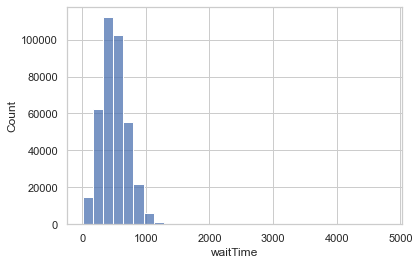

In [394]:
sns.histplot(data=sf_stacked_rh_wav_ridehail, x="waitTime", bins=30)

<AxesSubplot:xlabel='Realized_INEXUS_in_dollar', ylabel='Count'>

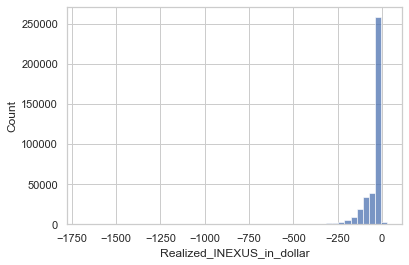

In [395]:
sns.histplot(data=sf_stacked_rh_wav_ridehail, x="Realized_INEXUS_in_dollar", bins=50)

In [396]:
sf_stacked_rh_wav_cutoff = sf_stacked_rh_wav_ridehail[sf_stacked_rh_wav_ridehail['waitTime'] < 1500]

In [397]:
sf_stacked_rh_wav_cutoff = sf_stacked_rh_wav_cutoff[sf_stacked_rh_wav_cutoff['Realized_INEXUS_in_dollar'] > -200]

In [398]:
sf_stacked_rh_wav_waitTime = sf_stacked_rh_wav_cutoff[sf_stacked_rh_wav_cutoff['waitTime'].notna()]

In [399]:
sf_stacked_rh_wav_INEXUS = sf_stacked_rh_wav_cutoff[sf_stacked_rh_wav_cutoff['Realized_INEXUS_in_dollar'].notna()]

In [409]:
%%time
sf_stacked_rh_wav_pivot = pd.pivot_table(
   sf_stacked_rh_wav_waitTime,
   index=['in_wheelchair', 'income_level', 'lever_position'],
   aggfunc={'waitTime': np.mean}).reset_index() 

CPU times: total: 78.1 ms
Wall time: 78 ms


In [410]:
sf_stacked_rh_wav_pivot

in_wheelchair income_level  lever_position   waitTime
0           False  High Income        0.050000 496.738672
1           False  High Income        0.100000 504.589176
2           False  High Income        0.200000 507.221373
3           False  High Income        0.500000 498.641187
4           False  High Income        1.000000 498.844717
5           False   Low Income        0.050000 492.193107
6           False   Low Income        0.100000 502.679693
7           False   Low Income        0.200000 500.424250
8           False   Low Income        0.500000 495.751118
9           False   Low Income        1.000000 492.900372
10           True  High Income        0.050000 502.551502
11           True  High Income        0.100000 508.651478
12           True  High Income        0.200000 509.129859
13           True  High Income        0.500000 508.792517
14           True  High Income        1.000000 498.322965
15           True   Low Income        0.050000 499.164899
16           True   Low Income        0.100000 498.898776
17           True   Low Income        0.200000 495.384242
18           True   Low Income        0.500000 491.774106
19           True   Low Income        1.000000 500.479883

In [411]:
%%time
sf_stacked_rh_wav_pivot_inexus = pd.pivot_table(
   sf_stacked_rh_wav_INEXUS,
   index=['in_wheelchair','income_level',"lever_position"],
   aggfunc={'Realized_INEXUS_in_dollar': np.mean}).reset_index() 

CPU times: total: 78.1 ms
Wall time: 77 ms


In [412]:
sf_stacked_rh_wav_pivot_inexus

in_wheelchair income_level  lever_position  Realized_INEXUS_in_dollar
0           False  High Income        0.050000                 -40.114292
1           False  High Income        0.100000                 -40.386421
2           False  High Income        0.200000                 -39.877334
3           False  High Income        0.500000                 -40.286719
4           False  High Income        1.000000                 -40.025615
5           False   Low Income        0.050000                 -42.233451
6           False   Low Income        0.100000                 -42.645843
7           False   Low Income        0.200000                 -42.162947
8           False   Low Income        0.500000                 -42.478104
9           False   Low Income        1.000000                 -42.221587
10           True  High Income        0.050000                 -23.260008
11           True  High Income        0.100000                 -25.183870
12           True  High Income        0.200000                 -27.743572
13           True  High Income        0.500000                 -29.002214
14           True  High Income        1.000000                 -29.693178
15           True   Low Income        0.050000                 -27.912752
16           True   Low Income        0.100000                 -26.666393
17           True   Low Income        0.200000                 -28.298366
18           True   Low Income        0.500000                 -30.369743
19           True   Low Income        1.000000                 -32.654131

In [413]:
sf_stacked_rh_wav_pivot['waitTime'] = sf_stacked_rh_wav_pivot['waitTime']/60

In [414]:
sf_stacked_rh_wav_pivot['legend'] = np.where((sf_stacked_rh_wav_pivot['income_level'] == "High Income") & (sf_stacked_rh_wav_pivot['in_wheelchair']==True),
"WC high-income", "no WC")

In [415]:
sf_stacked_rh_wav_pivot['legend'] = np.where((sf_stacked_rh_wav_pivot['income_level'] == "Low Income") & (sf_stacked_rh_wav_pivot['in_wheelchair']==True),
"WC low-income", sf_stacked_rh_wav_pivot['legend'])

In [416]:
sf_stacked_rh_wav_pivot

in_wheelchair income_level  lever_position  waitTime          legend
0           False  High Income        0.050000  8.278978           no WC
1           False  High Income        0.100000  8.409820           no WC
2           False  High Income        0.200000  8.453690           no WC
3           False  High Income        0.500000  8.310686           no WC
4           False  High Income        1.000000  8.314079           no WC
5           False   Low Income        0.050000  8.203218           no WC
6           False   Low Income        0.100000  8.377995           no WC
7           False   Low Income        0.200000  8.340404           no WC
8           False   Low Income        0.500000  8.262519           no WC
9           False   Low Income        1.000000  8.215006           no WC
10           True  High Income        0.050000  8.375858  WC high-income
11           True  High Income        0.100000  8.477525  WC high-income
12           True  High Income        0.200000  8.485498  WC high-income
13           True  High Income        0.500000  8.479875  WC high-income
14           True  High Income        1.000000  8.305383  WC high-income
15           True   Low Income        0.050000  8.319415   WC low-income
16           True   Low Income        0.100000  8.314980   WC low-income
17           True   Low Income        0.200000  8.256404   WC low-income
18           True   Low Income        0.500000  8.196235   WC low-income
19           True   Low Income        1.000000  8.341331   WC low-income

In [417]:
#plt.figure(figsize=(8,5))
#sns.pointplot(x='lever_position',y='waitTime', data=sf_stacked_rh_wav_pivot, hue='in_wheelchair')
#plt.title("Average Fare Price by Embarked Town")

In [418]:
#plt.figure(figsize=(12,8))
#sns.stripplot(x='lever_position', y='waitTime', data=sf_stacked_rh_wav_pivot, jitter=True, hue='in_wheelchair', dodge=True, palette='viridis')

In [419]:
#ax = sns.lineplot(data = sf_stacked_rh_wav_pivot, x = 'lever_position', y = 'waitTime', hue = 'legend',
#                 palette = 'turbo', marker='o',markers = 'True', ci=None)
#ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Average Wait Time (minutes)')
#ax.set_title('TNC Wait Time', fontsize=13)  
#plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)

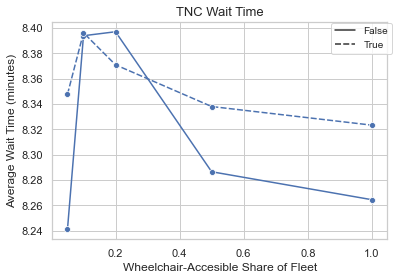

In [420]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot, x = 'lever_position', y = 'waitTime', style ='in_wheelchair',
                 palette = 'turbo', marker='o', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Average Wait Time (minutes)')
ax.set_title('TNC Wait Time', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)

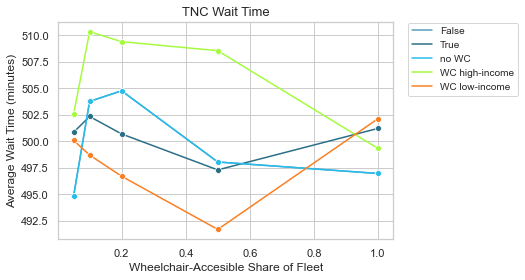

In [641]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_ridehail, x = 'lever_position', y = 'waitTime', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_ridehail, x = 'lever_position', y = 'waitTime', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Average Wait Time (minutes)')
ax.set_title('TNC Wait Time', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)
plt.savefig('waitTime.tif', bbox_inches='tight', dpi=300)

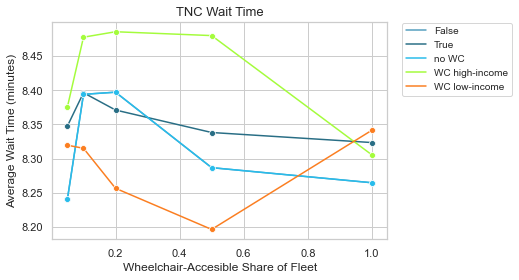

In [421]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot, x = 'lever_position', y = 'waitTime', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot, x = 'lever_position', y = 'waitTime', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Average Wait Time (minutes)')
ax.set_title('TNC Wait Time', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)
plt.savefig('waitTime.tif', bbox_inches='tight', dpi=300)

In [422]:
sf_stacked_rh_wav_pivot_inexus['legend'] = np.where((sf_stacked_rh_wav_pivot_inexus['income_level'] == "High Income") & (sf_stacked_rh_wav_pivot_inexus['in_wheelchair']==True),
"WC high-income", "no WC")

In [423]:
sf_stacked_rh_wav_pivot_inexus['legend'] = np.where((sf_stacked_rh_wav_pivot_inexus['income_level'] == "Low Income") & (sf_stacked_rh_wav_pivot_inexus['in_wheelchair']==True),
"WC low-income", sf_stacked_rh_wav_pivot_inexus['legend'])

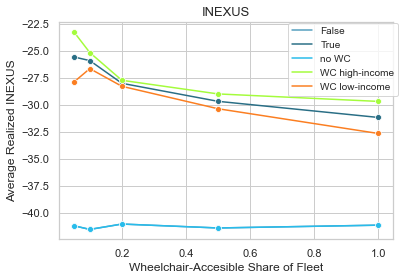

In [424]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_inexus, x = 'lever_position', y = 'Realized_INEXUS_in_dollar', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_inexus, x = 'lever_position', y = 'Realized_INEXUS_in_dollar', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Average Realized INEXUS')
ax.set_title('INEXUS', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)
plt.savefig('Realized_INEXUS.tif', bbox_inches='tight', dpi=300)

<AxesSubplot:xlabel='lever_position', ylabel='waitTime'>

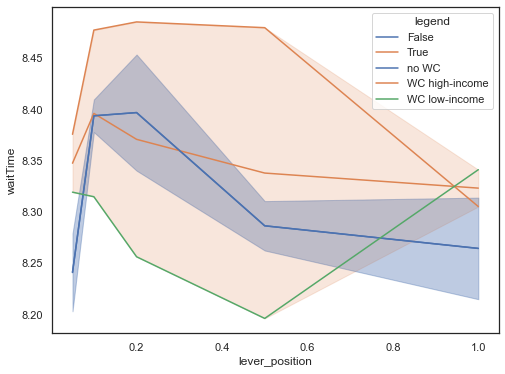

In [425]:
sns.set(style="white", color_codes=True)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.lineplot(x="lever_position", y="waitTime", hue='in_wheelchair', data=sf_stacked_rh_wav_pivot, ax=ax)
sns.lineplot(x="lever_position", y="waitTime", hue='legend', data=sf_stacked_rh_wav_pivot, ax = ax)

In [426]:
sf_stacked_rh_wav_ridehail.head()

IDMerged     tripIndex  scenario                  lever  lever_position  \
285       181  59686.000000  ridehail  wheelchair_accessible        0.050000   
576       322 105933.000000  ridehail  wheelchair_accessible        0.100000   
577       322 105933.000000  ridehail  wheelchair_accessible        0.200000   
670       355 116693.000000  ridehail  wheelchair_accessible        0.050000   
675       355 116694.000000  ridehail  wheelchair_accessible        0.050000   

     Realized_INEXUS  logsum_trip_Potential_INEXUS   actEndTime actEndType  \
285       -19.394982                     -2.022217 62413.000000   shopping   
576        -5.485089                     -2.001956 44779.000000       work   
577        -5.496603                     -1.985445 44334.000000       work   
670       -12.903482                     -1.050016 48225.000000     school   
675       -10.328608                     -1.430335 49063.000000     social   

     actStartTime actStartType  cost_BEAM mandatoryCat  distance_bike  \
285  63722.000000         Home  13.158389          NaN       0.000000   
576  45659.000000         Home  13.927631  from_M_to_H       0.000000   
577  45911.000000         Home  16.154173  from_M_to_H       0.000000   
670  48913.000000       social   2.745444          NaN       0.000000   
675  50198.000000         Home   3.365207          NaN       0.000000   

     distance_ridehail  distance_travelling  duration_in_privateCar  \
285       18415.742000         18415.742000                0.000000   
576       16071.492000         16071.492000                0.000000   
577       21540.620000         21540.620000                0.000000   
670        1359.330000          1359.330000                0.000000   
675        6572.016000          6572.016000                0.000000   

     duration_in_ridehail  duration_in_transit  duration_on_bike  \
285            726.000000             0.000000          0.000000   
576            657.000000             0.000000          0.000000   
577            876.000000             0.000000          0.000000   
670            115.000000             0.000000          0.000000   
675            435.000000             0.000000          0.000000   

     duration_travelling  duration_walking  emission_marginal   fuel_marginal  \
285           726.000000          0.000000           0.004976 67327584.437160   
576           657.000000          0.000000           0.000000 58757053.322160   
577           876.000000          0.000000           0.005821 78752075.907600   
670           115.000000          0.000000           0.000367  4969683.293400   
675           435.000000          0.000000           0.000626 24027159.055680   

    mode_choice_actual_BEAM mode_choice_planned_BEAM       numPassengers  \
285        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
576               ride_hail                ride_hail       1.0, 1.0, 1.0   
577        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
670        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
675        ride_hail_pooled         ride_hail_pooled  1.0, 1.0, 2.0, 1.0   

    reason  replanning_status  ride_hail_pooled  \
285    NaN                  0                 3   
576    NaN                  0                 0   
577    NaN                  0                 3   
670    NaN                  0                 3   
675    NaN                  0                 3   

                                    vehicleIds  year  duration_door_to_door  \
285  body-181, rideHailVehicle-5851413@default  2018            1309.000000   
576  rideHailVehicle-1028807@default, body-322  2018             880.000000   
577  body-322, rideHailVehicle-3908202@default  2018            1577.000000   
670  body-355, rideHailVehicle-1608124@default  2018             688.000000   
675   body-355, rideHailVehicle-551239@default  2018            1135.000000   

      waitTime        actPurpose mode_choice_actual_5 

In [41]:
#describe_wav = sf_stacked_rh_wav.describe()

In [42]:
#describe_wav.to_csv('C:/Shared-Work/Data/CleanData/describe_wav.csv')

In [498]:
sf_stacked_rh_wav_ridehail.reason.unique()

array([nan, 'ResourceUnavailable RIDE_HAIL',
       'ResourceUnavailable RIDE_HAIL_POOLED',
       'ResourceCapacityExhausted WALK_TRANSIT',
       'ResourceUnavailable RIDE_HAIL_TRANSIT',
       'ResourceCapacityExhausted RIDE_HAIL_TRANSIT',
       'ResourceCapacityExhausted WALK_TRANSIT, ResourceCapacityExhausted WALK_TRANSIT',
       'ResourceUnavailable RIDE_HAIL_POOLED, ResourceCapacityExhausted WALK_TRANSIT',
       'MissedTransitPickup DRIVE_TRANSIT',
       'ResourceCapacityExhausted DRIVE_TRANSIT',
       'ResourceCapacityExhausted RIDE_HAIL_TRANSIT, ResourceCapacityExhausted RIDE_HAIL_TRANSIT'],
      dtype=object)

In [636]:
denied = ['ResourceUnavailable RIDE_HAIL' , 'ResourceUnavailable RIDE_HAIL_POOLED', 'ResourceUnavailable RIDE_HAIL_TRANSIT']
sf_stacked_rh_wav_ridehail['denial_of_service'] = np.where(sf_stacked_rh_wav_ridehail.reason.isin(denied),
"denied", 'accepted')

C:\Users\nazanin\AppData\Local\Temp\2\ipykernel_7200\2729190344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_stacked_rh_wav_ridehail['denial_of_service'] = np.where(sf_stacked_rh_wav_ridehail.reason.isin(denied),


In [637]:
sf_stacked_rh_wav_ridehail.head()

IDMerged     tripIndex  scenario                  lever  lever_position  \
285       181  59686.000000  ridehail  wheelchair_accessible        0.050000   
576       322 105933.000000  ridehail  wheelchair_accessible        0.100000   
577       322 105933.000000  ridehail  wheelchair_accessible        0.200000   
670       355 116693.000000  ridehail  wheelchair_accessible        0.050000   
675       355 116694.000000  ridehail  wheelchair_accessible        0.050000   

     Realized_INEXUS  logsum_trip_Potential_INEXUS   actEndTime actEndType  \
285       -19.394982                     -2.022217 62413.000000   shopping   
576        -5.485089                     -2.001956 44779.000000       work   
577        -5.496603                     -1.985445 44334.000000       work   
670       -12.903482                     -1.050016 48225.000000     school   
675       -10.328608                     -1.430335 49063.000000     social   

     actStartTime actStartType  cost_BEAM mandatoryCat  distance_bike  \
285  63722.000000         Home  13.158389          NaN       0.000000   
576  45659.000000         Home  13.927631  from_M_to_H       0.000000   
577  45911.000000         Home  16.154173  from_M_to_H       0.000000   
670  48913.000000       social   2.745444          NaN       0.000000   
675  50198.000000         Home   3.365207          NaN       0.000000   

     distance_ridehail  distance_travelling  duration_in_privateCar  \
285       18415.742000         18415.742000                0.000000   
576       16071.492000         16071.492000                0.000000   
577       21540.620000         21540.620000                0.000000   
670        1359.330000          1359.330000                0.000000   
675        6572.016000          6572.016000                0.000000   

     duration_in_ridehail  duration_in_transit  duration_on_bike  \
285            726.000000             0.000000          0.000000   
576            657.000000             0.000000          0.000000   
577            876.000000             0.000000          0.000000   
670            115.000000             0.000000          0.000000   
675            435.000000             0.000000          0.000000   

     duration_travelling  duration_walking  emission_marginal   fuel_marginal  \
285           726.000000          0.000000           0.004976 67327584.437160   
576           657.000000          0.000000           0.000000 58757053.322160   
577           876.000000          0.000000           0.005821 78752075.907600   
670           115.000000          0.000000           0.000367  4969683.293400   
675           435.000000          0.000000           0.000626 24027159.055680   

    mode_choice_actual_BEAM mode_choice_planned_BEAM       numPassengers  \
285        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
576               ride_hail                ride_hail       1.0, 1.0, 1.0   
577        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
670        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
675        ride_hail_pooled         ride_hail_pooled  1.0, 1.0, 2.0, 1.0   

    reason  replanning_status  ride_hail_pooled  \
285    NaN                  0                 3   
576    NaN                  0                 0   
577    NaN                  0                 3   
670    NaN                  0                 3   
675    NaN                  0                 3   

                                    vehicleIds  year  duration_door_to_door  \
285  body-181, rideHailVehicle-5851413@default  2018            1309.000000   
576  rideHailVehicle-1028807@default, body-322  2018             880.000000   
577  body-322, rideHailVehicle-3908202@default  2018            1577.000000   
670  body-355, rideHailVehicle-1608124@default  2018             688.000000   
675   body-355, rideHailVehicle-551239@default  2018            1135.000000   

      waitTime        actPurpose mode_choice_actual_5 

In [638]:
%%time
#sf_stacked_rh_wav_pivot_denial = pd.pivot_table(
#   sf_stacked_rh_wav_ridehail,
#   index=['in_wheelchair','income_level', 'lever_position'],
#   aggfunc={'denial_of_service': np.count_nonzero}).reset_index() 

CPU times: total: 0 ns
Wall time: 0 ns


In [639]:
%%time
sf_stacked_rh_wav_pivot_denial = pd.pivot_table(
   sf_stacked_rh_wav_ridehail,
   index=['in_wheelchair','income_level', 'lever_position', 'denial_of_service'],
   aggfunc={'prob_denial': np.mean}).reset_index() 

CPU times: total: 109 ms
Wall time: 111 ms


In [640]:
sf_stacked_rh_wav_pivot_denial

in_wheelchair income_level  lever_position denial_of_service  prob_denial
0           False  High Income        0.050000          accepted     0.987906
1           False  High Income        0.050000            denied     0.012094
2           False  High Income        0.100000          accepted     0.987906
3           False  High Income        0.100000            denied     0.012094
4           False  High Income        0.200000          accepted     0.987906
5           False  High Income        0.200000            denied     0.012094
6           False  High Income        0.500000          accepted     0.987906
7           False  High Income        0.500000            denied     0.012094
8           False  High Income        1.000000          accepted     0.987906
9           False  High Income        1.000000            denied     0.012094
10          False   Low Income        0.050000          accepted     0.989051
11          False   Low Income        0.050000            denied     0.010949
12          False   Low Income        0.100000          accepted     0.989051
13          False   Low Income        0.100000            denied     0.010949
14          False   Low Income        0.200000          accepted     0.989051
15          False   Low Income        0.200000            denied     0.010949
16          False   Low Income        0.500000          accepted     0.989051
17          False   Low Income        0.500000            denied     0.010949
18          False   Low Income        1.000000          accepted     0.989051
19          False   Low Income        1.000000            denied     0.010949
20           True  High Income        0.050000          accepted     0.993016
21           True  High Income        0.050000            denied     0.006984
22           True  High Income        0.100000          accepted     0.993016
23           True  High Income        0.100000            denied     0.006984
24           True  High Income        0.200000          accepted     0.993016
25           True  High Income        0.200000            denied     0.006984
26           True  High Income        0.500000          accepted     0.993016
27           True  High Income        0.500000            denied     0.006984
28           True  High Income        1.000000          accepted     0.993016
29           True  High Income        1.000000            denied     0.006984
30           True   Low Income        0.050000          accepted     0.993542
31           True   Low Income        0.050000            denied     0.006458
32           True   Low Income        0.100000          accepted     0.993542
33           True   Low Income        0.100000            denied     0.006458
34           True   Low Income        0.200000          accepted     0.993542
35           True   Low Income        0.200000            denied     0.006458
36           True   Low Income        0.500000          accepted     0.993542
37           True   Low Income        0.500000            denied     0.006458
38           True   Low Income        1.000000          accepted     0.993542
39           True   Low Income        1.000000            denied     0.006458

In [478]:
#import scipy.integrate
#import scipy.special
#mu=sf_stacked_rh_wav_pivot_denial.denial_of_service.mean()
#sig=sf_stacked_rh_wav_pivot_denial.denial_of_service.std()
#sf_stacked_rh_wav_pivot_denial['z']=scipy.stats.mstats.zscore(sf_stacked_rh_wav_pivot_denial.denial_of_service)
#sf_stacked_rh_wav_pivot_denial['prob']=sf_stacked_rh_wav_pivot_denial['denial_of_service'].apply(lambda x: scipy.stats.norm(mu,sig).pdf(x) if x > mu else 1 - scipy.stats.norm(mu,sig).pdf(x))

In [603]:
sf_stacked_rh_wav_pivot_denial['perc_denial']= (sf_stacked_rh_wav_pivot_denial['denial_of_service']/sf_stacked_rh_wav_pivot_denial['denial_of_service'].sum())

TypeError: unsupported operand type(s) for /: 'str' and 'str'

#### pivot tables

In [525]:
#By default, it is performing the 'mean' aggregation function on all available numerical columns.
pivot = sf_stacked_rh_wav_ridehail.pivot_table(index=['lever_position', 'in_wheelchair'])

In [526]:
pivot.to_csv('C:/Shared-Work/Data/CleanData/pivot_wav.csv')

In [532]:
sf_stacked_rh_wav_ridehail.pivot_table(index=['lever_position', 'in_wheelchair'], values=['waitTime'])

waitTime
lever_position in_wheelchair           
0.050000       False         494.836759
               True          500.848185
0.100000       False         503.760202
               True          502.335997
0.200000       False         504.754651
               True          500.688773
0.500000       False         498.047650
               True          497.301616
1.000000       False         496.963041
               True          501.210628

In [534]:
sf_stacked_rh_wav_ridehail.pivot_table(
    index=['lever_position', 'in_wheelchair'], 
    values=['waitTime'], 
    aggfunc=['sum', 'count']
)
# The dict equivalent
# aggfunc={ 'sales': ['sum', 'count']}

sum    count
                                    waitTime waitTime
lever_position in_wheelchair                         
0.050000       False         35778677.000000    72304
               True            758785.000000     1515
0.100000       False         36429419.000000    72315
               True           1320139.000000     2628
0.200000       False         36300945.000000    71918
               True           1819503.000000     3634
0.500000       False         35819587.000000    71920
               True           2215976.000000     4456
1.000000       False         35646165.000000    71728
               True           2339150.000000     4667

In [535]:
sf_stacked_rh_wav_ridehail.pivot_table(
    index=['lever_position', 'in_wheelchair'], 
    values=['waitTime'], 
    aggfunc='mean', 
    columns=['income_level']
)

waitTime           
income_level                 High Income Low Income
lever_position in_wheelchair                       
0.050000       False          497.405410 492.060379
               True           502.551502 500.091516
0.100000       False          504.942046 502.489958
               True           510.323601 498.700443
0.200000       False          508.410915 500.841796
               True           509.386165 496.703050
0.500000       False          499.728348 496.245599
               True           508.536388 491.691790
1.000000       False          500.218015 493.500921
               True           499.327439 502.126433

In [539]:
sf_stacked_rh_wav_ridehail.pivot_table(
    index=['lever_position', 'in_wheelchair'], 
    values=['waitTime', 'Realized_INEXUS_in_dollar', 'denial_of_service'], 
    aggfunc='count', 
    fill_value=0,
    margins=True
)

Realized_INEXUS_in_dollar  denial_of_service  \
lever_position in_wheelchair                                                 
0.05           False                              72304              72304   
               True                                1515               1515   
0.1            False                              72315              72315   
               True                                2628               2628   
0.2            False                              71918              71918   
               True                                3634               3634   
0.5            False                              71920              71920   
               True                                4456               4456   
1.0            False                              71728              71728   
               True                                4667               4667   
All                                              377085             377085   

                              waitTime  
lever_position in_wheelchair            
0.05           False             72304  
               True               1515  
0.1            False             72315  
               True               2628  
0.2            False             71918  
               True               3634  
0.5            False             71920  
               True               4456  
1.0            False             71728  
               True               4667  
All                             377085

In [508]:
pd.crosstab(sf_stacked_rh_wav_ridehail['lever_position'], sf_stacked_rh_wav_ridehail['denial_of_service'])

denial_of_service  accepted  denied
lever_position                     
0.050000              72999     820
0.100000              74154     789
0.200000              74733     819
0.500000              75465     911
1.000000              75465     930

In [465]:
pd.crosstab(sf_stacked_rh_wav_ridehail['in_wheelchair'],sf_stacked_rh_wav_ridehail['denial_of_service'])

denial_of_service  accepted  denied
in_wheelchair                      
False                356028    4157
True                  16788     112

In [610]:
sf_stacked_rh_wav_pivot_denial['legend'] = np.where((sf_stacked_rh_wav_pivot_denial['income_level'] == 'Low Income') & (sf_stacked_rh_wav_pivot_denial['in_wheelchair']==True),
"WC low-income", "no WC")

In [611]:
sf_stacked_rh_wav_pivot_denial['legend'] = np.where((sf_stacked_rh_wav_pivot_denial['income_level'] == 'High Income') & (sf_stacked_rh_wav_pivot_denial['in_wheelchair']==True),
"WC high-income", sf_stacked_rh_wav_pivot_denial['legend'])

In [612]:
sf_stacked_rh_wav_pivot_denial

in_wheelchair income_level  lever_position denial_of_service  prob_denial  \
0           False  High Income        0.050000          accepted     0.987906   
1           False  High Income        0.050000            denied     0.012094   
2           False  High Income        0.100000          accepted     0.987906   
3           False  High Income        0.100000            denied     0.012094   
4           False  High Income        0.200000          accepted     0.987906   
5           False  High Income        0.200000            denied     0.012094   
6           False  High Income        0.500000          accepted     0.987906   
7           False  High Income        0.500000            denied     0.012094   
8           False  High Income        1.000000          accepted     0.987906   
9           False  High Income        1.000000            denied     0.012094   
10          False   Low Income        0.050000          accepted     0.989051   
11          False   Low Income        0.050000            denied     0.010949   
12          False   Low Income        0.100000          accepted     0.989051   
13          False   Low Income        0.100000            denied     0.010949   
14          False   Low Income        0.200000          accepted     0.989051   
15          False   Low Income        0.200000            denied     0.010949   
16          False   Low Income        0.500000          accepted     0.989051   
17          False   Low Income        0.500000            denied     0.010949   
18          False   Low Income        1.000000          accepted     0.989051   
19          False   Low Income        1.000000            denied     0.010949   
20           True  High Income        0.050000          accepted     0.993016   
21           True  High Income        0.050000            denied     0.006984   
22           True  High Income        0.100000          accepted     0.993016   
23           True  High Income        0.100000            denied     0.006984   
24           True  High Income        0.200000          accepted     0.993016   
25           True  High Income        0.200000            denied     0.006984   
26           True  High Income        0.500000          accepted     0.993016   
27           True  High Income        0.500000            denied     0.006984   
28           True  High Income        1.000000          accepted     0.993016   
29           True  High Income        1.000000            denied     0.006984   
30           True   Low Income        0.050000          accepted     0.993542   
31           True   Low Income        0.050000            denied     0.006458   
32           True   Low Income        0.100000          accepted     0.993542   
33           True   Low Income        0.100000            denied     0.006458   
34           True   Low Income        0.200000          accepted     0.993542   
35           True   Low Income        0.200000            denied     0.006458   
36           True   Low Income        0.500000          accepted     0.993542   
37           True   Low Income        0.500000            denied     0.006458   
38           True   Low Income        1.000000          accepted     0.993542   
39           True   Low Income        1.000000            denied     0.006458   

            legend  
0            no WC  
1            no WC  
2            no WC  
3            no WC  
4            no WC  
5            no WC  
6            no WC  
7            no WC  
8            no WC  
9            no WC  
10           no WC  
11           no WC  
12           no WC  
13           no WC  
14           no WC  
15           no WC  
16           no WC  
17           no WC  
18           no WC  
19           no WC  
20  WC high-income  
21  WC high-income  
22  WC high-income  
23  WC high-income  
24  WC high-income  
25  WC high-income  
26  WC high-income  
27  WC high-income  
28  WC high-income  
29  WC high-income  
30   WC low-income  
31   WC lo

In [ ]:
sf_stacked_rh_wav_pivot_denial['perc_denial']= (sf_stacked_rh_wav_pivot_denial['denial_of_service']/sf_stacked_rh_wav_pivot_denial['denial_of_service'].sum())

In [645]:
s1 = sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level','denial_of_service'])['denial_of_service'].transform('size') 
s2 = sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level'])['denial_of_service'].transform('count') 

sf_stacked_rh_wav_ridehail['prob_denial'] = s1 / s2

C:\Users\nazanin\AppData\Local\Temp\2\ipykernel_7200\3666173193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_stacked_rh_wav_ridehail['prob_denial'] = s1 / s2


In [649]:
a = (sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level'])['denial_of_service'].value_counts() / 
     sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level'])['denial_of_service'].count())

sf_stacked_rh_wav_ridehail = sf_stacked_rh_wav_ridehail.join(a.rename('prob_denial_new'), on=['in_wheelchair','income_level', 'denial_of_service'])

In [646]:
sf_stacked_rh_wav_ridehail['legend'] = np.where((sf_stacked_rh_wav_ridehail['income_level'] == 'Low Income') & (sf_stacked_rh_wav_ridehail['in_wheelchair']==True),
"WC low-income", "no WC")

C:\Users\nazanin\AppData\Local\Temp\2\ipykernel_7200\3924638087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_stacked_rh_wav_ridehail['legend'] = np.where((sf_stacked_rh_wav_ridehail['income_level'] == 'Low Income') & (sf_stacked_rh_wav_ridehail['in_wheelchair']==True),


In [647]:
sf_stacked_rh_wav_ridehail['legend'] = np.where((sf_stacked_rh_wav_ridehail['income_level'] == 'High Income') & (sf_stacked_rh_wav_ridehail['in_wheelchair']==True),
"WC high-income", sf_stacked_rh_wav_ridehail['legend'])

C:\Users\nazanin\AppData\Local\Temp\2\ipykernel_7200\4209208665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_stacked_rh_wav_ridehail['legend'] = np.where((sf_stacked_rh_wav_ridehail['income_level'] == 'High Income') & (sf_stacked_rh_wav_ridehail['in_wheelchair']==True),


In [648]:
sf_stacked_rh_wav_ridehail.head()

IDMerged     tripIndex  scenario                  lever  lever_position  \
285       181  59686.000000  ridehail  wheelchair_accessible        0.050000   
576       322 105933.000000  ridehail  wheelchair_accessible        0.100000   
577       322 105933.000000  ridehail  wheelchair_accessible        0.200000   
670       355 116693.000000  ridehail  wheelchair_accessible        0.050000   
675       355 116694.000000  ridehail  wheelchair_accessible        0.050000   

     Realized_INEXUS  logsum_trip_Potential_INEXUS   actEndTime actEndType  \
285       -19.394982                     -2.022217 62413.000000   shopping   
576        -5.485089                     -2.001956 44779.000000       work   
577        -5.496603                     -1.985445 44334.000000       work   
670       -12.903482                     -1.050016 48225.000000     school   
675       -10.328608                     -1.430335 49063.000000     social   

     actStartTime actStartType  cost_BEAM mandatoryCat  distance_bike  \
285  63722.000000         Home  13.158389          NaN       0.000000   
576  45659.000000         Home  13.927631  from_M_to_H       0.000000   
577  45911.000000         Home  16.154173  from_M_to_H       0.000000   
670  48913.000000       social   2.745444          NaN       0.000000   
675  50198.000000         Home   3.365207          NaN       0.000000   

     distance_ridehail  distance_travelling  duration_in_privateCar  \
285       18415.742000         18415.742000                0.000000   
576       16071.492000         16071.492000                0.000000   
577       21540.620000         21540.620000                0.000000   
670        1359.330000          1359.330000                0.000000   
675        6572.016000          6572.016000                0.000000   

     duration_in_ridehail  duration_in_transit  duration_on_bike  \
285            726.000000             0.000000          0.000000   
576            657.000000             0.000000          0.000000   
577            876.000000             0.000000          0.000000   
670            115.000000             0.000000          0.000000   
675            435.000000             0.000000          0.000000   

     duration_travelling  duration_walking  emission_marginal   fuel_marginal  \
285           726.000000          0.000000           0.004976 67327584.437160   
576           657.000000          0.000000           0.000000 58757053.322160   
577           876.000000          0.000000           0.005821 78752075.907600   
670           115.000000          0.000000           0.000367  4969683.293400   
675           435.000000          0.000000           0.000626 24027159.055680   

    mode_choice_actual_BEAM mode_choice_planned_BEAM       numPassengers  \
285        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
576               ride_hail                ride_hail       1.0, 1.0, 1.0   
577        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
670        ride_hail_pooled         ride_hail_pooled       1.0, 1.0, 1.0   
675        ride_hail_pooled         ride_hail_pooled  1.0, 1.0, 2.0, 1.0   

    reason  replanning_status  ride_hail_pooled  \
285    NaN                  0                 3   
576    NaN                  0                 0   
577    NaN                  0                 3   
670    NaN                  0                 3   
675    NaN                  0                 3   

                                    vehicleIds  year  duration_door_to_door  \
285  body-181, rideHailVehicle-5851413@default  2018            1309.000000   
576  rideHailVehicle-1028807@default, body-322  2018             880.000000   
577  body-322, rideHailVehicle-3908202@default  2018            1577.000000   
670  body-355, rideHailVehicle-1608124@default  2018             688.000000   
675   body-355, rideHailVehicle-551239@default  2018            1135.000000   

      waitTime        actPurpose mode_choice_actual_5 

In [613]:
sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level'])['denial_of_service'].value_counts() / sf_stacked_rh_wav_ridehail.groupby(['in_wheelchair','income_level'])['denial_of_service'].count()
#df.groupby('a').b.apply(lambda g: g.value_counts()/len(g))

lever_position  in_wheelchair  income_level  denial_of_service
0.050000        False          High Income   accepted            0.988284
                                             denied              0.011716
                               Low Income    accepted            0.989265
                                             denied              0.010735
                True           High Income   accepted            0.995708
                                             denied              0.004292
                               Low Income    accepted            0.995234
                                             denied              0.004766
0.100000        False          High Income   accepted            0.988788
                                             denied              0.011212
                               Low Income    accepted            0.989757
                                             denied              0.010243
                True           High Income   acce

In [635]:
sf_stacked_rh_wav_ridehail.prob_denial.max()

0.993542193908718

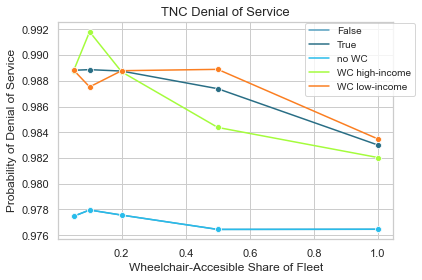

In [656]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_ridehail, x = 'lever_position', y = 'prob_denial_new', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_ridehail, x = 'lever_position', y = 'prob_denial_new', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Probability of Denial of Service')
ax.set_title('TNC Denial of Service', fontsize=13)  
plt.legend(bbox_to_anchor = (1.08, 1.02), fontsize = 10)
plt.savefig('denial_of_service.tif', bbox_inches='tight', dpi=300)

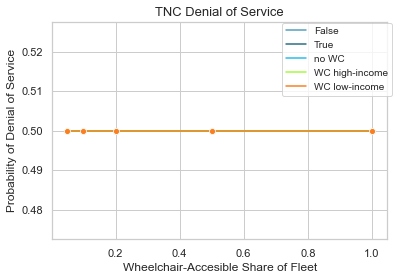

In [621]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_denial, x = 'lever_position', y = 'prob_denial', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_denial, x = 'lever_position', y = 'prob_denial', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Probability of Denial of Service')
ax.set_title('TNC Denial of Service', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)
plt.savefig('denial_of_service.tif', bbox_inches='tight', dpi=300)

In [619]:
sf_stacked_rh_wav_pivot_denial

in_wheelchair income_level  lever_position denial_of_service  prob_denial  \
0           False  High Income        0.050000          accepted     0.987906   
1           False  High Income        0.050000            denied     0.012094   
2           False  High Income        0.100000          accepted     0.987906   
3           False  High Income        0.100000            denied     0.012094   
4           False  High Income        0.200000          accepted     0.987906   
5           False  High Income        0.200000            denied     0.012094   
6           False  High Income        0.500000          accepted     0.987906   
7           False  High Income        0.500000            denied     0.012094   
8           False  High Income        1.000000          accepted     0.987906   
9           False  High Income        1.000000            denied     0.012094   
10          False   Low Income        0.050000          accepted     0.989051   
11          False   Low Income        0.050000            denied     0.010949   
12          False   Low Income        0.100000          accepted     0.989051   
13          False   Low Income        0.100000            denied     0.010949   
14          False   Low Income        0.200000          accepted     0.989051   
15          False   Low Income        0.200000            denied     0.010949   
16          False   Low Income        0.500000          accepted     0.989051   
17          False   Low Income        0.500000            denied     0.010949   
18          False   Low Income        1.000000          accepted     0.989051   
19          False   Low Income        1.000000            denied     0.010949   
20           True  High Income        0.050000          accepted     0.993016   
21           True  High Income        0.050000            denied     0.006984   
22           True  High Income        0.100000          accepted     0.993016   
23           True  High Income        0.100000            denied     0.006984   
24           True  High Income        0.200000          accepted     0.993016   
25           True  High Income        0.200000            denied     0.006984   
26           True  High Income        0.500000          accepted     0.993016   
27           True  High Income        0.500000            denied     0.006984   
28           True  High Income        1.000000          accepted     0.993016   
29           True  High Income        1.000000            denied     0.006984   
30           True   Low Income        0.050000          accepted     0.993542   
31           True   Low Income        0.050000            denied     0.006458   
32           True   Low Income        0.100000          accepted     0.993542   
33           True   Low Income        0.100000            denied     0.006458   
34           True   Low Income        0.200000          accepted     0.993542   
35           True   Low Income        0.200000            denied     0.006458   
36           True   Low Income        0.500000          accepted     0.993542   
37           True   Low Income        0.500000            denied     0.006458   
38           True   Low Income        1.000000          accepted     0.993542   
39           True   Low Income        1.000000            denied     0.006458   

            legend  
0            no WC  
1            no WC  
2            no WC  
3            no WC  
4            no WC  
5            no WC  
6            no WC  
7            no WC  
8            no WC  
9            no WC  
10           no WC  
11           no WC  
12           no WC  
13           no WC  
14           no WC  
15           no WC  
16           no WC  
17           no WC  
18           no WC  
19           no WC  
20  WC high-income  
21  WC high-income  
22  WC high-income  
23  WC high-income  
24  WC high-income  
25  WC high-income  
26  WC high-income  
27  WC high-income  
28  WC high-income  
29  WC high-income  
30   WC low-income  
31   WC lo

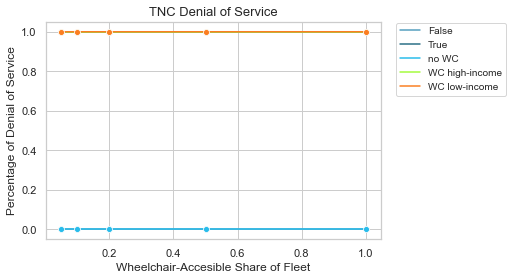

In [480]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_denial, x = 'lever_position', y = 'prob', hue = 'in_wheelchair',
                 palette = 'PuBuGn_d', marker='o',markers = 'True', ci=None)
ax = sns.lineplot(data = sf_stacked_rh_wav_pivot_denial, x = 'lever_position', y = 'prob', hue = 'legend',
                 palette = 'turbo', marker='o',markers = 'True', ci=None)
ax.set(xlabel='Wheelchair-Accesible Share of Fleet', ylabel='Percentage of Denial of Service')
ax.set_title('TNC Denial of Service', fontsize=13)  
plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)
plt.savefig('denial_of_service.tif', bbox_inches='tight', dpi=300)

In [44]:
mand_wav = sf_stacked_rh_wav[(sf_stacked_rh_wav['mandatoryCat'] == 'from_H_to_M')|(sf_stacked_rh_wav['mandatoryCat'] == 'from_M_to_H')|
                        (sf_stacked_rh_wav['mandatoryCat'] == 'from_M_to_M')]

In [46]:
mand_wav_cutoff = mand_wav[(mand_wav['logsum_trip_Potential_INEXUS'] < 13.4)&(mand_wav['logsum_trip_Potential_INEXUS'] >= -33)]

In [34]:
# Add the mandatory category column
#mandatory = ['work' , 'univ', 'school']
#sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType.isin(mandatory)) & (sf_rh_flsz_025.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [35]:
#sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType == 'Home') & (sf_rh_flsz_025.actStartType.isin(mandatory)), 'from_H_to_M' , sf_rh_flsz_025['mandatoryCat'])

In [47]:
#sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType.isin(mandatory)) & (sf_rh_flsz_025.actStartType == "Home"), 'from_M_to_H' , sf_rh_flsz_025['mandatoryCat'])

In [37]:
#mand_rh_025 = sf_rh_flsz_025[(sf_rh_flsz_025['mandatoryCat'] == 'from_H_to_M')|(sf_rh_flsz_025['mandatoryCat'] == 'from_M_to_H')|
                        #(sf_rh_flsz_025['mandatoryCat'] == 'from_M_to_M')]

In [38]:
#mand_rh_025_cutoff = mand_rh_025[(mand_rh_025['logsum_trip_mode_AS_trips'] < 13.4)&(mand_rh_025['logsum_trip_mode_AS_trips'] >= -33)]

#### Consumer Surplus

In [35]:
#sf_stacked_tr_fr['sum_deciles'] = sf_stacked_tr_fr.groupby(["income_deciles"])["Realized_INEXUS_in_dollar"].transform('sum')

In [49]:
%%time
sf_rh_25_pivot = pd.pivot_table(
   mand_rh_025_cutoff,
   index=["income_deciles"],
   aggfunc={'logsum_trip_mode_AS_trips': np.mean
           }).reset_index()

CPU times: total: 250 ms
Wall time: 261 ms


In [49]:
%%time
sf_rh_25_pivot = pd.pivot_table(
   mand_rh_025_cutoff,
   index=["income_deciles"],
   aggfunc={'logsum_trip_mode_AS_trips': np.mean
           }).reset_index()

CPU times: total: 15.6 ms
Wall time: 14.7 ms


In [51]:
sf_rh_175_pivot

income_deciles  logsum_trip_mode_AS_trips
0            1st                  -1.254786
1            2nd                  -1.157305
2            3rd                  -1.092615
3            4th                  -1.120260
4            5th                  -1.125633
5            6th                  -1.101058
6            7th                  -1.071199
7            8th                  -1.073584
8            9th                  -1.072546
9           10th                  -1.076517

In [39]:
(mand_rh_025_cutoff["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff["logsum_trip_mode_AS_trips"].sum())

19869.234207703732

In [40]:
(mand_rh__175_cutoff["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff["logsum_trip_mode_AS_trips"].sum())

97478.70494903834

In [41]:
(mand_rh_025_cutoff[mand_rh_025_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum())

1436.4658449637936

In [42]:
(mand_rh_025_cutoff[mand_rh_025_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum())

2146.7332377277635

In [43]:
(mand_rh__175_cutoff[mand_rh__175_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum())

7651.096853345938

In [64]:
(mand_base_cutoff[mand_base_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum())

-9774.690104701658

In [71]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum())

-607.9696224819618

In [72]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh_025_cutoff[mand_rh_025_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum())

-96.72623762308103

In [73]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum())

-96870.73532655637

In [74]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh_025_cutoff[mand_rh_025_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum())

-19772.507970080245

In [ ]:
(mand_rh_025_cutoff["logsum_trip_mode_AS_trips"].sum())

In [47]:
sf_rh_flsz_05["logsum_trip_mode_AS_trips"].sum()

-1488993.0053371296

In [57]:
(sf_baseline_2018["logsum_trip_mode_AS_trips"].sum()) - (sf_rh_flsz_025["logsum_trip_mode_AS_trips"].sum())

9869.75257863151

In [58]:
(sf_baseline_2018["logsum_trip_mode_AS_trips"].sum()) - (sf_rh_flsz_0125["logsum_trip_mode_AS_trips"].sum())

-45565.456184184644

In [44]:
(sf_rh_flsz_150["logsum_trip_mode_AS_trips"].sum()) - (sf_baseline_2018["logsum_trip_mode_AS_trips"].sum())

26700.032719435636

In [34]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Potential_INEXUS_in_dollar"].sum())

-8552568.299760805

In [33]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 0.5]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

630632.6794885471

In [30]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

466561.96703839116

In [21]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 2.0]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

442079.29897010326

In [22]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 0.5]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

10178.111374210566

In [23]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

-196644.6037200652

In [24]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 2.0]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

-213147.6406978406

#### Gini Coefficient

In [38]:
sf_stacked_tr_fr.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1      24300.0
0.2      41000.0
0.3      57600.0
0.4      74500.0
0.5      93400.0
0.6     114000.0
0.7     140000.0
0.8     174600.0
0.9     240100.0
1.0    1354000.0
Name: income, dtype: float64

In [83]:
# determine the quartile values to use with pd.cut
deciles = sf_stacked_tr_fr['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [84]:
# add a lower and upper range for the bins in pd.cut
deciles = [0] + deciles + [float('inf')]

In [85]:
# add a quartiles column to groups, using pd.cut
sf_stacked_tr_fr['income_deciles'] = pd.cut(sf_stacked_tr_fr['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [35]:
sf_stacked_tr_fr['sum_deciles'] = sf_stacked_tr_fr.groupby(["income_deciles"])["Realized_INEXUS_in_dollar"].transform('sum')

In [98]:
%%time
sf_stacked_tr_fr_pivot = pd.pivot_table(
   sf_stacked_tr_fr,
   index=["lever_position",'income_deciles'],
   aggfunc={'logsum_trip_Potential_INEXUS': np.sum, 'Realized_INEXUS': np.sum
           }).reset_index() 

CPU times: total: 422 ms
Wall time: 423 ms


In [99]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

In [78]:
sf_stacked_tr_fr_pivot['Potential_INEXUS_in_dollar'] = sf_stacked_tr_fr_pivot['Potential_INEXUS_in_dollar'].cumsum()

In [73]:
sf_stacked_tr_fr_pivot['Realized_INEXUS_in_dollar'] = sf_stacked_tr_fr_pivot['Realized_INEXUS_in_dollar'].cumsum()

In [100]:
sf_stacked_tr_fr_pivot

lever_position income_deciles  Realized_INEXUS  \
0         0.500000            1st   -165594.336650   
1         0.500000            2nd   -170185.110219   
2         0.500000            3rd   -170233.204081   
3         0.500000            4th   -170847.673506   
4         0.500000            5th   -173152.874501   
5         0.500000            6th   -171622.804634   
6         0.500000            7th   -168576.592262   
7         0.500000            8th   -169961.378469   
8         0.500000            9th   -170998.250971   
9         0.500000           10th   -169638.215015   
10        1.000000            1st   -164429.119009   
11        1.000000            2nd   -170007.916942   
12        1.000000            3rd   -169941.708951   
13        1.000000            4th   -170548.443092   
14        1.000000            5th   -173586.290539   
15        1.000000            6th   -171971.472049   
16        1.000000            7th   -168928.683795   
17        1.000000            8th   -170156.758694   
18        1.000000            9th   -172254.997915   
19        1.000000           10th   -170293.252495   
20        1.500000            1st   -167452.126799   
21        1.500000            2nd   -172106.582692   
22        1.500000            3rd   -172217.336100   
23        1.500000            4th   -172619.694984   
24        1.500000            5th   -175247.046254   
25        1.500000            6th   -173832.648883   
26        1.500000            7th   -170521.063609   
27        1.500000            8th   -172388.189959   
28        1.500000            9th   -173457.013400   
29        1.500000           10th   -171816.141741   
30        2.000000            1st   -167137.866663   
31        2.000000            2nd   -171825.420595   
32        2.000000            3rd   -171948.964422   
33        2.000000            4th   -172838.475319   
34        2.000000            5th   -175767.345739   
35        2.000000            6th   -173593.035102   
36        2.000000            7th   -170721.362684   
37        2.000000            8th   -172584.272242   
38        2.000000            9th   -173846.193577   
39        2.000000           10th   -173025.837768   

    logsum_trip_Potential_INEXUS  
0                  -81039.857966  
1                  -83407.791913  
2                  -82569.944816  
3                  -83241.088196  
4                  -86948.938085  
5                  -84719.440718  
6                  -80745.251150  
7                  -83276.933948  
8                  -85511.159844  
9                  -83113.352969  
10                 -85374.004375  
11                 -89840.956896  
12                 -88630.249405  
13                 -89579.658552  
14                 -93296.501282  
15                 -91189.166135  
16                 -87890.572429  
17                 -89462.621319  
18                 -92235.068362  
19                 -90027.793234  
20                 -81909.299137  
21                 -85232.643749  
22                 -84331.771052  
23                 -84764.536126  
24                 -88522.320240  
25                 -86317.797785  
26                 -82248.725699  
27                 -85028.563621  
28                 -87460.342036  
29                 -85180.399043  
30                 -82005.708285  
31                 -84647.785842  
32                 -84325.931778  
33                 -84787.654909  
34                 -89191.447890  
35                 -86237.265511  
36                 -83324.530740  
37                 -85174.847822  
38                 -87861.872475  
39                 -85781.271751

In [4]:
mand_rh_flsz = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['mandatoryCat'] == 'from_H_to_M')|(sf_stacked_rh_flsz['mandatoryCat'] == 'from_M_to_H')|
                        (sf_stacked_rh_flsz['mandatoryCat'] == 'from_M_to_M')]

In [ ]:
mand_rh_flsz_cutoff = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['logsum_trip_mode_AS_trips'] < 0)&(sf_stacked_rh_flsz['logsum_trip_mode_AS_trips'] >= -0.1)]

In [36]:
mand_rh_flsz_cutoff_r = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['Realized_INEXUS'] < 0.2)&(sf_stacked_rh_flsz['Realized_INEXUS'] >= -1)]

In [10]:
sf_stacked_rh_wav.head()

IDMerged  tripIndex  scenario                  lever  lever_position  \
0         1      577.0  ridehail  wheelchair_accessible            0.05   
1         1      577.0  ridehail  wheelchair_accessible            0.10   
2         1      577.0  ridehail  wheelchair_accessible            0.20   
3         1      577.0  ridehail  wheelchair_accessible            0.50   
4         1      577.0  ridehail  wheelchair_accessible            1.00   

   Realized_INEXUS  logsum_trip_Potential_INEXUS  actEndTime actEndType  \
0        -2.556534                     -2.379715     29548.0       Home   
1        -2.259198                     -2.082021     29634.0       Home   
2        -2.025999                     -1.846963     31150.0       Home   
3        -2.057970                     -1.880321     30927.0       Home   
4        -2.424988                     -2.247943     29350.0       Home   

   actStartTime actStartType  cost_BEAM mandatoryCat  distance_bike  \
0       29708.0     othmaint        0.0          NaN            0.0   
1       29779.0     othmaint        0.0          NaN            0.0   
2       31338.0     othmaint        0.0          NaN            0.0   
3       31156.0     othmaint        0.0          NaN            0.0   
4       29478.0     othmaint        0.0          NaN            0.0   

   distance_mode_choice  distance_privateCar  distance_ridehail  \
0              4313.862             4313.862                0.0   
1              3902.559             3902.559                0.0   
2              4704.452             4704.452                0.0   
3              5946.986             5946.986                0.0   
4              3415.483             3415.483                0.0   

   distance_transit  distance_travelling  distance_walking  \
0               0.0             4313.862               0.0   
1               0.0             3902.559               0.0   
2               0.0             4704.452               0.0   
3               0.0             5946.986               0.0   
4               0.0             3415.483               0.0   

   duration_in_privateCar  duration_in_ridehail  duration_in_transit  \
0                   160.0                   0.0                  0.0   
1                   145.0                   0.0                  0.0   
2                   188.0                   0.0                  0.0   
3                   229.0                   0.0                  0.0   
4                   128.0                   0.0                  0.0   

   duration_on_bike  duration_travelling  duration_walking  emissionBiodiesel  \
0               0.0                160.0               0.0                0.0   
1               0.0                145.0               0.0                0.0   
2               0.0                188.0               0.0                0.0   
3               0.0                229.0               0.0                0.0   
4               0.0                128.0               0.0                0.0   

   emissionDiesel  emissionElectricity  emissionFood  emissionGasoline  \
0             0.0                  0.0           0.0               0.0   
1             0.0                  0.0           0.0               0.0   
2             0.0                  0.0           0.0               0.0   
3             0.0                  0.0           0.0               0.0   
4             0.0                  0.0           0.0               0.0   

   emission_marginal  fuelBiodiesel  fuelDiesel  fuelElectricity  fuelFood  \
0                0.0            0.0         0.0              0.0       0.0   
1                0.0            0.0         0.0              0.0       0.0   
2                0.0            0.0         0.0              0.0       0.0   
3                0.0            0.0         0.0              0.0       0.0   
4                0.0            0.0         0.0              0.0       0.0   

   fuelGasoline  fuel_marginal  fuel_not_Food mode_choice_actual

KeyboardInterrupt: 

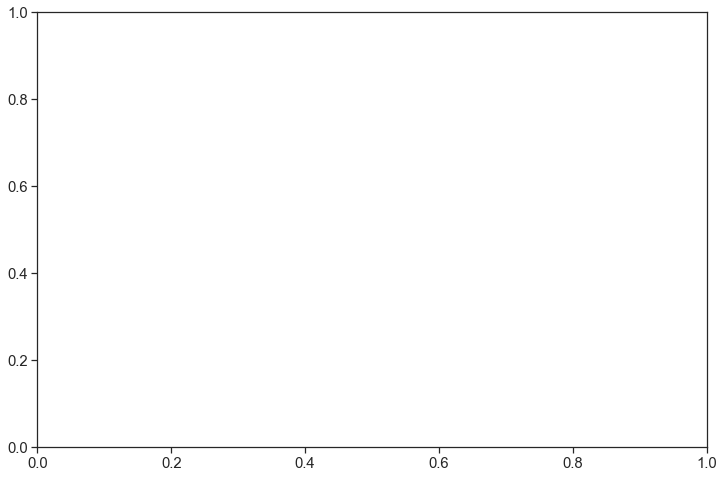

In [12]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
sns.kdeplot(data=sf_stacked_rh_wav, x="lever_position", y ='Realized_INEXUS_in_dollar', hue="lever_position", cut=0, fill=True, common_norm=False, alpha=1, palette = "turbo")
plt.show()

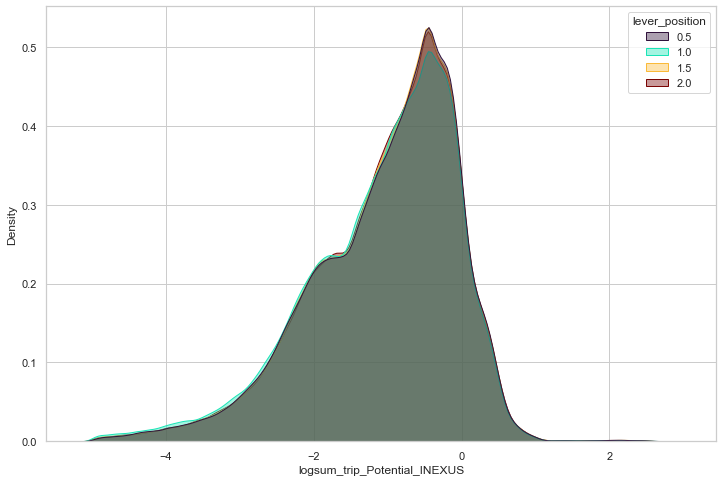

In [134]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
# With transparency
sns.kdeplot(data=mand, x="logsum_trip_Potential_INEXUS", hue="lever_position", fill=True, common_norm=False, alpha=0.4, palette = "turbo")
plt.show()

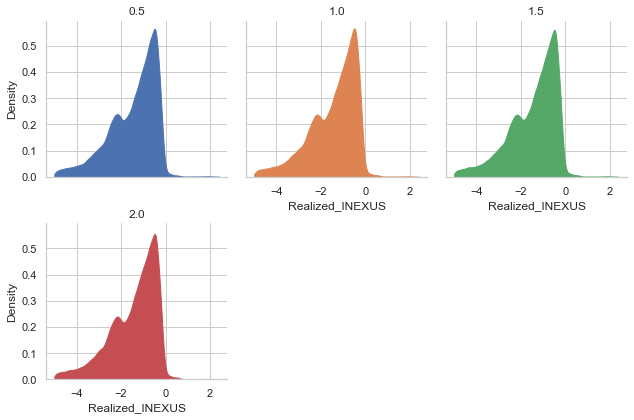

In [38]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(mand, col='lever_position', hue='lever_position', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"Realized_INEXUS", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Realized_INEXUS', ylabel='Density'>

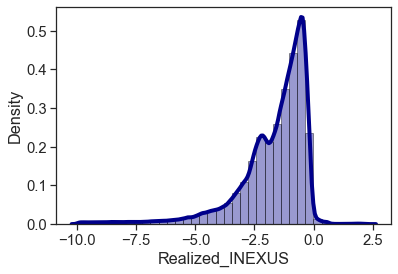

In [32]:
sns.distplot(mand['Realized_INEXUS'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [52]:
# List of five airlines to plot
scenarios = ["1stQ", '2ndQ', '3rdQ', '4thQ']

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand_rh_flsz_cutoff[mand_rh_flsz_cutoff['income_quartiles'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_mode_AS_trips'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Income Quntiles')
plt.xlabel('Potential_INEXUS')
plt.ylabel('Density')

NameError: name 'mand_rh_flsz_cutoff_r' is not defined

In [ ]:
# List of five airlines to plot
scenarios = [0.25, 1.0, 1.75]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand_rh_flsz_cutoff[mand_rh_flsz_cutoff['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_mode_AS_trips'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario Lever Position')
plt.title('Ridehail Fleet Size Scenarios vs. Baseline')
plt.xlabel('Potential_INEXUS')
plt.ylabel('Density')

In [89]:
# List of five airlines to plot
scenarios = [0.5, 1.0, 1.5, 2.0]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand[mand['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario')
plt.title('Transit Frequency Scenarios vs. Baseline')
plt.xlabel('Realized_INEXUS')
plt.ylabel('Density')

TypeError: distplot() got an unexpected keyword argument 'palette'

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logsum_trip_Potential_INEXUS', ylabel='Density'>

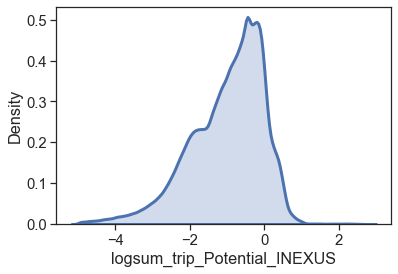

In [85]:
sns.distplot(mand['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = scenario)

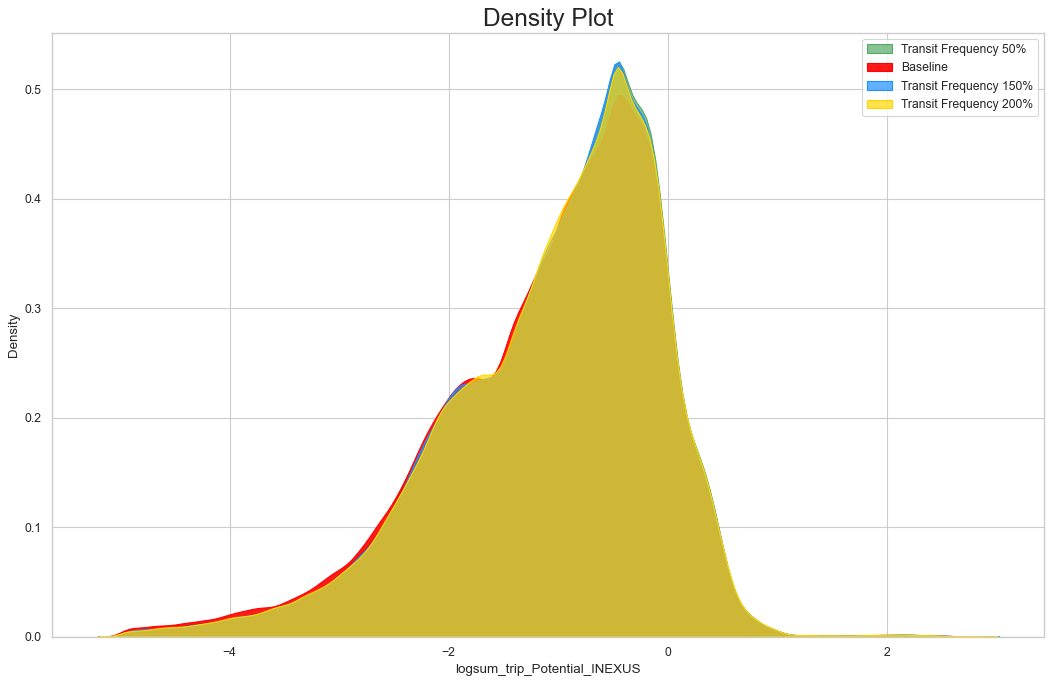

In [68]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "logsum_trip_Potential_INEXUS"], shade=True, color="g", label="Transit Frequency 50%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="gold", label="Transit Frequency 200%", alpha=.7)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

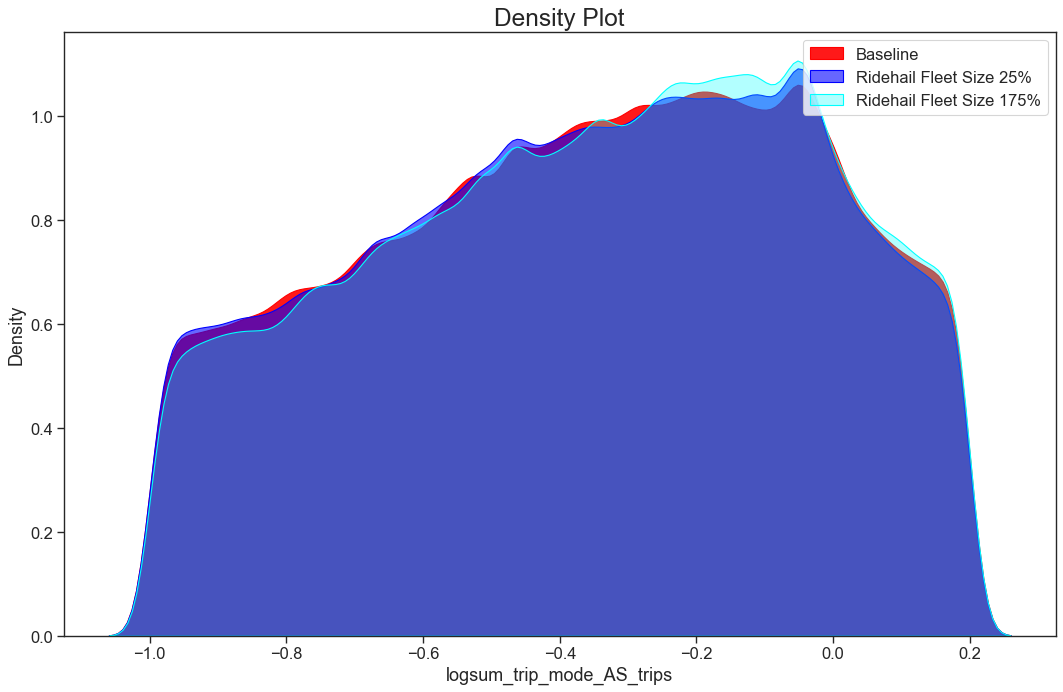

In [40]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.0, "logsum_trip_mode_AS_trips"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 0.25, "logsum_trip_mode_AS_trips"], shade=True, color="blue", label="Ridehail Fleet Size 25%", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.75, "logsum_trip_mode_AS_trips"], shade=True, color="cyan", label="Ridehail Fleet Size 175%", alpha=0.3)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

In [42]:
mand_rh_flsz_cutoff.income_quartiles.unique()

array(['4thQ', '2ndQ', '3rdQ', '1stQ', nan], dtype=object)

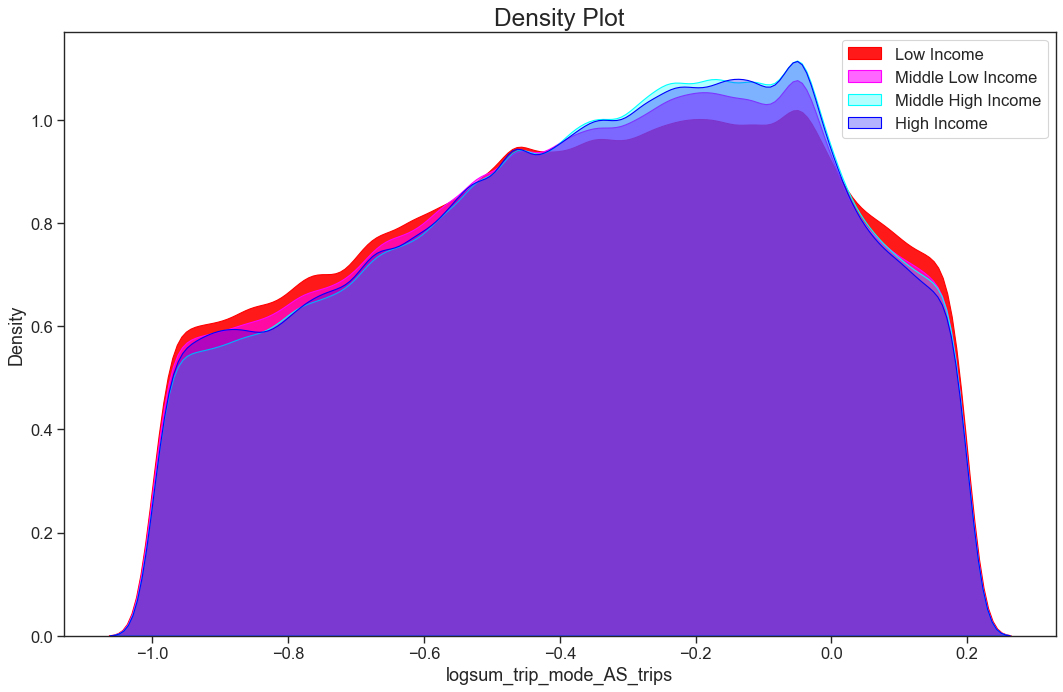

In [48]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == "1stQ", "logsum_trip_mode_AS_trips"], shade=True, color="red", label="Low Income", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '2ndQ', "logsum_trip_mode_AS_trips"], shade=True, color="magenta", label="Middle Low Income", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '3rdQ', "logsum_trip_mode_AS_trips"], shade=True, color="cyan", label="Middle High Income", alpha=0.3)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '4thQ', "logsum_trip_mode_AS_trips"], shade=True, color="blue", label="High Income", alpha=0.3)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

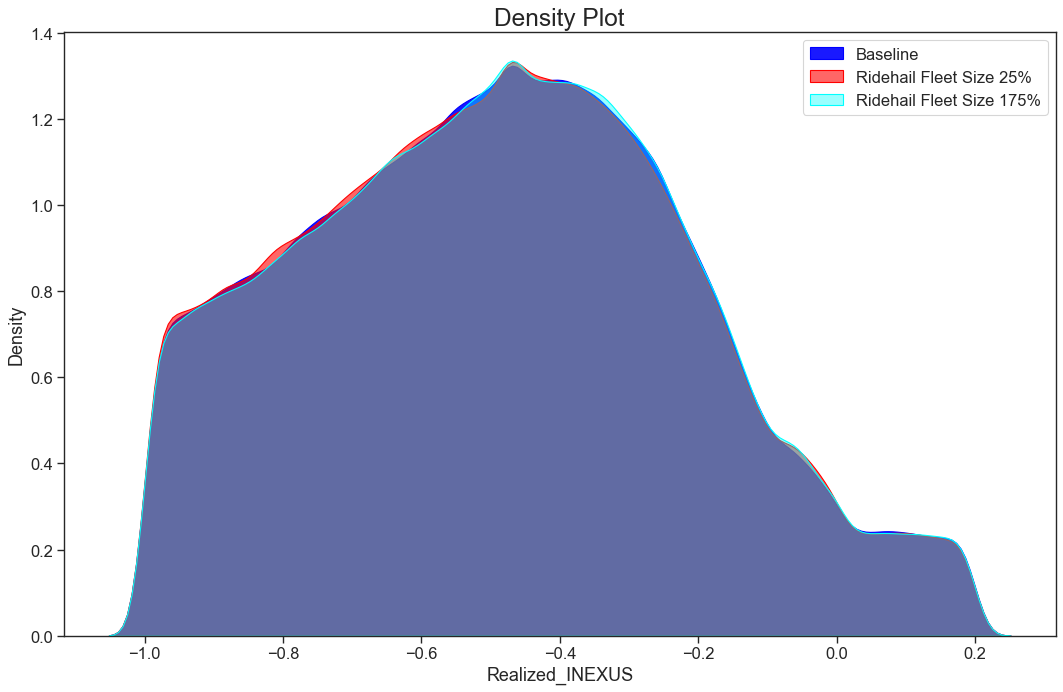

In [38]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.0, "Realized_INEXUS"], shade=True, color="blue", label="Baseline", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 0.25, "Realized_INEXUS"], shade=True, color="red", label="Ridehail Fleet Size 25%", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.75, "Realized_INEXUS"], shade=True, color="cyan", label="Ridehail Fleet Size 175%", alpha=0.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

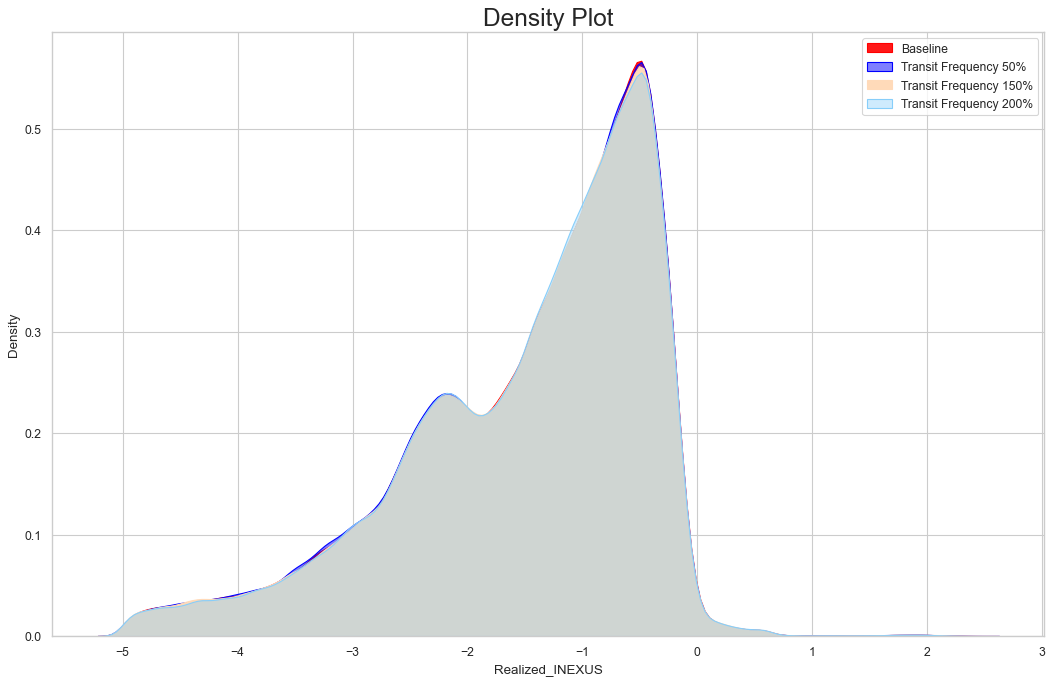

In [90]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Realized_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Realized_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Realized_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Realized_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

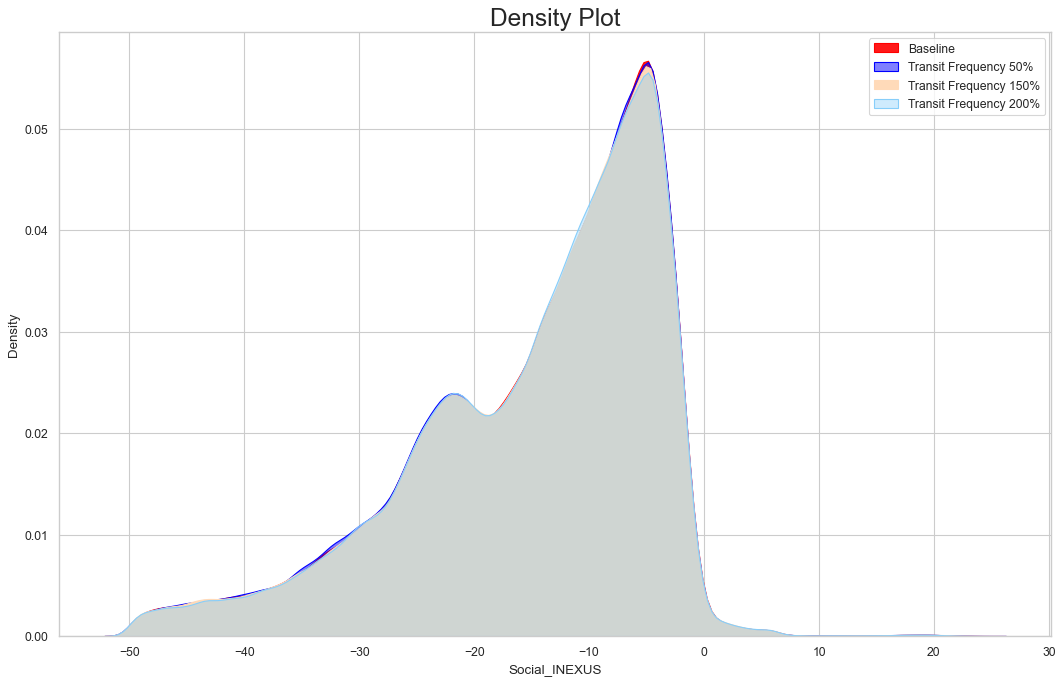

In [92]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Social_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Social_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Social_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Social_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

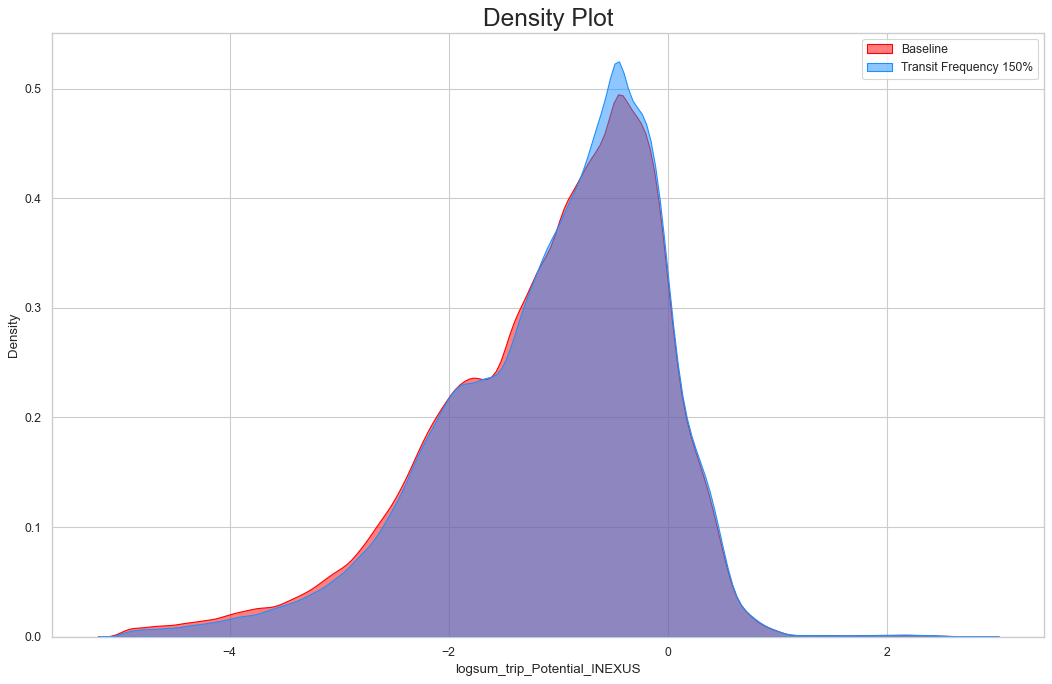

In [62]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

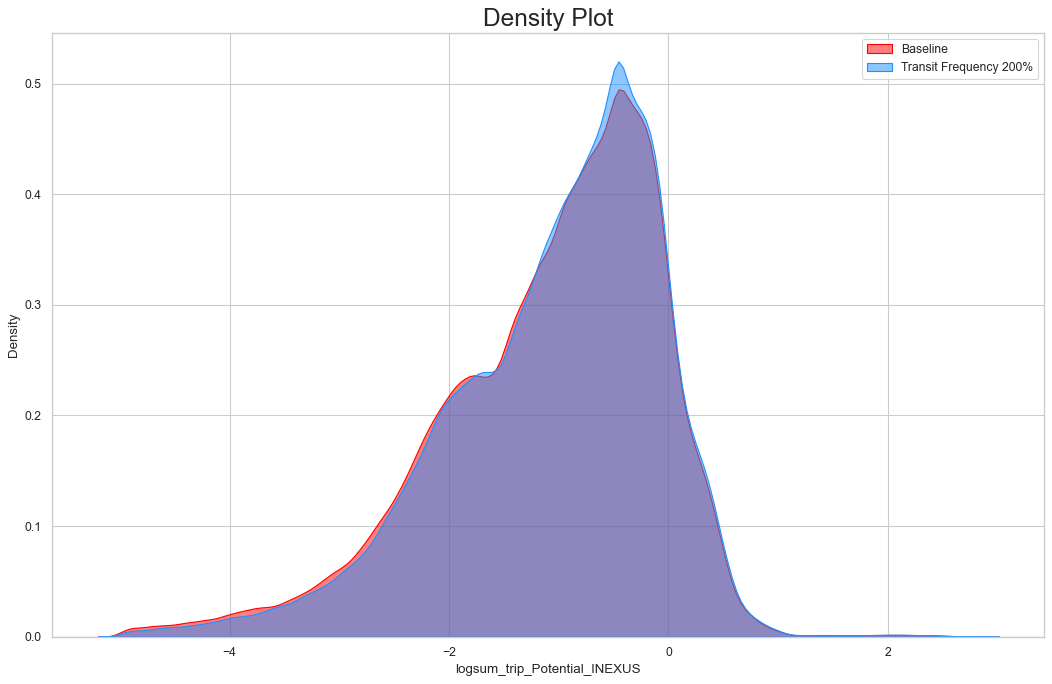

In [63]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 200%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()